# Analysis on Udemy Web Development Courses


For this project, I am imagining I am a data analyst working at Udemy in 2017. Udemy is a highly popular online learning platform where courses on a great number of subjects such as computer programming or project management are made accessible to anyone willing to learn. I have a manager who comes and makes a request to determine what is the most important metric to pay attention to in this new data about our courses we have just recieved. I am also asked to look into how we can boost revenue while keeping subscriber retention.

This a dataset on Udemy web developement courses from 2017, scrapped by user @chasewillden at *[data.world](https://data.world/chasewillden/web-development-courses-from-udemy).* 

With the request I have been given, I ask myself a number of questions before reading in the data:
- what are some inital observations I find? 
- what is the behavior and characteristics of a business metric that Udemy should consider as important? 
- how do each of the columns fare as useful business metrics?
- can we make any predictions or call to actions using what we have found about the behaviors of said metrics.

---
# Reading Data and First Impressions
First, we'll load in the data and explore the first few rows as well as each columns' data types to see what we're dealing with.

In [1]:
import pandas as pd

# making sure the max number of rows are shown if desired
pd.set_option("display.max_rows", None)

web_dev = pd.read_csv("UdemyWebDevelopment.csv")

# make a copy of unclean data to compare to clean data later
original = web_dev

display(web_dev.head())
print("\n")

display(web_dev.shape)
print("\n")
display(web_dev.dtypes)

,id,title,url,isPaid,price,numSubscribers,numReviews,numPublishedLectures,instructionalLevel,contentInfo,publishedTime,Unnamed: 11,Unnamed: 12,Is Paid,Total,Percent
0,28295,Learn Web Designing & HTML5/CSS3 Essentials in...,https://www.udemy.com/build-beautiful-html5-we...,True,75,43285,525,24,All Levels,4 hours,2013-01-03T00:55:31Z,NaN,NaN,Yes,1067.0,89%
1,19603,Learning Dynamic Website Design - PHP MySQL an...,https://www.udemy.com/learning-dynamic-website...,True,50,47886,285,125,All Levels,12.5 hours,2012-06-18T16:52:34Z,NaN,NaN,No,133.0,11%
2,889438,ChatBots: Messenger ChatBot with API.AI and No...,https://www.udemy.com/chatbots/,True,50,2577,529,64,All Levels,4.5 hours,2016-06-30T16:57:08Z,NaN,NaN,NaN,NaN,NaN
3,197836,Projects in HTML5,https://www.udemy.com/projects-in-html5/,True,60,8777,206,75,Intermediate Level,15.5 hours,2014-06-17T05:43:50Z,NaN,NaN,NaN,NaN,NaN
4,505208,Programming Foundations: HTML5 + CSS3 for Entr...,https://www.udemy.com/html-css-more/,True,20,23764,490,58,Beginner Level,5.5 hours,2015-10-17T04:52:25Z,NaN,NaN,NaN,NaN,NaN


(1200, 16)

id                        int64
title                    object
url                      object
isPaid                     bool
price                    object
numSubscribers            int64
numReviews                int64
numPublishedLectures      int64
instructionalLevel       object
contentInfo              object
publishedTime            object
Unnamed: 11             float64
Unnamed: 12             float64
Is Paid                  object
Total                   float64
Percent                  object
dtype: object

# Checking for Missing Values
We can see that the last 5 columns are either entirely or almost empty. Columns `Unnamed: 11` and `Unnamed: 12` have no values whatsoever; the `Is Paid`, `Total`, and `Percent` columns are most likely constructed by the creater of this dataset but will serve little purpose for this analysis. All 5 of these columns will be dropped. The `isPaid` column is also most likely constructed by the dataset's creator but we will leave it where it is.

The dataset will also be sorted by the `numSubscribers` column to see which courses are the most and least popular.

In [2]:
# loop through the columns to find the percentage of null values in each column
import numpy as np
for col in web_dev.columns:
    pct_missing = np.mean(web_dev[col].isnull())
    print('{} - {}%'.format(col, pct_missing*100))
    
# drop columns that aren't meaningful
web_dev = web_dev.drop(["Unnamed: 11","Unnamed: 12","Is Paid","Total","Percent"], axis=1)

# sort dataframe and the copy by numSubscribers (popularity)
web_dev = web_dev.sort_values(by=['numSubscribers'], ascending=False)
original = original.sort_values(by=['numSubscribers'], ascending=False)

id - 0.0%
title - 0.0%
url - 0.0%
isPaid - 0.0%
price - 0.0%
numSubscribers - 0.0%
numReviews - 0.0%
numPublishedLectures - 0.0%
instructionalLevel - 0.0%
contentInfo - 0.0%
publishedTime - 0.0%
Unnamed: 11 - 100.0%
Unnamed: 12 - 100.0%
Is Paid - 99.83333333333333%
Total - 99.83333333333333%
Percent - 99.83333333333333%


---
# Initial Cleaning
After finding that there are no missing values, we look at the other columns and immediately see that the `published_date` is in a strange format with unnecessary data. The data type of this column will simply be changed into a date format.

In the `instructionalLevel` column, we see that all of the values contain the substrings ` Level` and ` Levels` — this is completely unnecessary since we already know what all of the values represent based on the column name. This substring will be removed from all rows in this column.

In [3]:
# clean publishedTime column, we don't need to know the exact time of publication
web_dev.publishedTime = pd.to_datetime(web_dev.publishedTime).dt.date
web_dev = web_dev.rename(columns = {web_dev.columns[10]: "published_date"})

# clean instructionalLevel column, remove fluff " Levels" substring
web_dev.instructionalLevel = web_dev.instructionalLevel.str.split().str[0]

web_dev.head()

,id,title,url,isPaid,price,numSubscribers,numReviews,numPublishedLectures,instructionalLevel,contentInfo,published_date
349,41295,Learn HTML5 Programming From Scratch,https://www.udemy.com/learn-html5-programming-...,False,Free,268923,8629,45,All,10.5 hours,2013-02-14
554,59014,Coding for Entrepreneurs Basic,https://www.udemy.com/coding-for-entrepreneurs...,False,Free,161029,279,27,Beginner,3.5 hours,2013-06-09
752,625204,The Web Developer Bootcamp,https://www.udemy.com/the-web-developer-bootcamp/,True,200,121584,27445,342,All,43 hours,2015-11-02
305,173548,Build Your First Website in 1 Week with HTML5 ...,https://www.udemy.com/build-your-first-website...,False,Free,120291,5924,30,Beginner,3 hours,2014-04-08
754,764164,The Complete Web Developer Course 2.0,https://www.udemy.com/the-complete-web-develop...,True,200,114512,22412,304,All,30.5 hours,2016-03-08


# Cleaning the Price Column
When looking at the data types for all of the columns we see that the data type for the `price` column is `object`. We want this column to be `int` so that we can perform calculations and create a `revenue` column if we wanted to. However, making a reveune column is not viable for an analysis with data from Udemy. Udemy tends to mark their courses down with large discounts, such as discounting a class worth \\$100 down to \\$20. If we made a revenue column here, it would not be representative of the true revenue generated by these courses.

After checking what's happening with the `price` column, we can see that one of the values is the string `Free`. To make the data type of this column into `int`, we just simply replace the string `Free` with `0` and use the `astype()` method on the column to make the data type converstion into `int`.

In [4]:
# there are 133 instances of the string "Free"
display(web_dev.price.value_counts().head())
display(web_dev.price.dtype)
print("\n")

# replace string with 0 and change column dtype to int
web_dev.price.replace("Free", 0, inplace=True)
web_dev.price = web_dev.price.astype(int)

display(web_dev.price.value_counts().head(5))
display(web_dev.price.dtype)

20      187
Free    133
50      121
200     113
195      72
Name: price, dtype: int64

dtype('O')

20     187
0      133
50     121
200    113
195     72
Name: price, dtype: int64

dtype('int32')

# Cleaning The `contentInfo` Column
As like the `price` column, we aren't able to perform any calculations for the `contentInfo` column if there is a substring attached for the unit. 

We'll first change the column name to `contentInfo_hours` and then see what we are dealing with. The interesting thing is that there are some values expressed in minutes instead of hours. We need to first convert the values that are in minutes to be expressed in hours instead so that we don't get confused with something like `34 mins` for `34 hours` when we remove all of the unit substrings. However, the exact number of minutes and the difference in the number of minutes a course has is redundant, so we will express any course shorter than 1 hour as `0` hours.

In [5]:
# adjust the column name to indicate that the float values are in hours
web_dev = web_dev.rename(columns = {web_dev.columns[9]: "contentInfo_hours"})

# check the number of rows that has the substring " mins"
mins = web_dev[web_dev.contentInfo_hours.str.contains(" mins")].shape[0]
print('{} rows containing substring " mins"'.format(mins))

display(web_dev.contentInfo_hours.dtype)
print("\n")

# change any row containing substring " mins" to 0
web_dev.contentInfo_hours = web_dev.contentInfo_hours.apply(lambda x: '0' if ' mins' in x else x)

# remove " hour" and " hours" substrings from all rows; change column to float
web_dev.contentInfo_hours = web_dev.contentInfo_hours.replace(to_replace =[' hour$',' hours$'], value = "", regex = True)
web_dev.contentInfo_hours = web_dev.contentInfo_hours.astype(float)

# check column dtype and number of rows that have been changed to 0
mins = (web_dev['contentInfo_hours'].values == 0).sum()
print('{} rows now containing float 0.0'.format(mins))
display(web_dev.contentInfo_hours.value_counts().head())
web_dev.contentInfo_hours.dtype

76 rows containing substring " mins"


dtype('O')



76 rows now containing float 0.0


1.0    136
1.5    124
2.0    123
3.0     82
0.0     76
Name: contentInfo_hours, dtype: int64

dtype('float64')

# Data is Now Clean
Here we will compare the original dataset before cleaning to the now cleaned data to see if we are now satisfied with the cleaning.

In [6]:
display(original.head())
web_dev.head()

,id,title,url,isPaid,price,numSubscribers,numReviews,numPublishedLectures,instructionalLevel,contentInfo,publishedTime,Unnamed: 11,Unnamed: 12,Is Paid,Total,Percent
349,41295,Learn HTML5 Programming From Scratch,https://www.udemy.com/learn-html5-programming-...,False,Free,268923,8629,45,All Levels,10.5 hours,2013-02-14T07:03:41Z,NaN,NaN,NaN,NaN,NaN
554,59014,Coding for Entrepreneurs Basic,https://www.udemy.com/coding-for-entrepreneurs...,False,Free,161029,279,27,Beginner Level,3.5 hours,2013-06-09T15:51:55Z,NaN,NaN,NaN,NaN,NaN
752,625204,The Web Developer Bootcamp,https://www.udemy.com/the-web-developer-bootcamp/,True,200,121584,27445,342,All Levels,43 hours,2015-11-02T21:13:27Z,NaN,NaN,NaN,NaN,NaN
305,173548,Build Your First Website in 1 Week with HTML5 ...,https://www.udemy.com/build-your-first-website...,False,Free,120291,5924,30,Beginner Level,3 hours,2014-04-08T16:21:30Z,NaN,NaN,NaN,NaN,NaN
754,764164,The Complete Web Developer Course 2.0,https://www.udemy.com/the-complete-web-develop...,True,200,114512,22412,304,All Levels,30.5 hours,2016-03-08T22:28:36Z,NaN,NaN,NaN,NaN,NaN


,id,title,url,isPaid,price,numSubscribers,numReviews,numPublishedLectures,instructionalLevel,contentInfo_hours,published_date
349,41295,Learn HTML5 Programming From Scratch,https://www.udemy.com/learn-html5-programming-...,False,0,268923,8629,45,All,10.5,2013-02-14
554,59014,Coding for Entrepreneurs Basic,https://www.udemy.com/coding-for-entrepreneurs...,False,0,161029,279,27,Beginner,3.5,2013-06-09
752,625204,The Web Developer Bootcamp,https://www.udemy.com/the-web-developer-bootcamp/,True,200,121584,27445,342,All,43.0,2015-11-02
305,173548,Build Your First Website in 1 Week with HTML5 ...,https://www.udemy.com/build-your-first-website...,False,0,120291,5924,30,Beginner,3.0,2014-04-08
754,764164,The Complete Web Developer Course 2.0,https://www.udemy.com/the-complete-web-develop...,True,200,114512,22412,304,All,30.5,2016-03-08


---
# Regression Analysis of `contentInfo_hours` and `price`
We would think that we can make assumptions that the amount of hours a course has would give us a rough indicator of how it would be priced. Let's take a deeper look into the `price` and `contentInfo_hours` columns and see if there's a significant relationship between them.

In [7]:
# taking a quick glance at some basic statistics of these two columns
web_dev[["price","contentInfo_hours"]].describe().round(2)

,price,contentInfo_hours
count,1200.00,1200.00
mean,77.03,5.56
std,66.08,7.28
min,0.00,0.00
25%,20.00,1.50
50%,50.00,3.00
75%,115.00,6.50
max,200.00,76.50


The fact that the standard deviation for price is \\$66.08 from the mean merits further investigation. To look deeper into whether there is a cause and effect relationship between the `price` and `contentInfo_hours`, we will obtain statistical calculations needed to create a linear regression model and visualize that model for these columns using the `statsmodels.api` module.

In [8]:
import statsmodels.api as sm

# creating a linear regression which predicts price based on course length in hours
y = web_dev.price
x = sm.add_constant(web_dev.contentInfo_hours)

results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.143
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     200.3
Date:                Sun, 17 Oct 2021   Prob (F-statistic):           3.62e-42
Time:                        21:27:06   Log-Likelihood:                -6638.5
No. Observations:                1200   AIC:                         1.328e+04
Df Residuals:                    1198   BIC:                         1.329e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                57.9377      2.223     26.066      0.000      53.577      62.299
contentInfo_hours     3.4368      0.243     14.154      0.000       2.960       3.913
==============================================================================
Omnibus:                       96.132   Durbin-Watson:                   1.886
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              117.606
Skew:                           0.759   Prob(JB):                     2.90e-26
Kurtosis:                       2.784   Cond. No.                         11.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# We Now Have Our Regression Model
Using the `contentInfo_hours` coefficient as the y-intercept and `const` coefficient as the regression constant from the second table above, we can build our linear regression model as `ŷ = 3.4368x + 57.9377`. Based on this model, there should be a positive trend, suggesting that as the number of hours a course has goes up, its price should go up as well.

Below, we will now visualize this model and observe our findings.

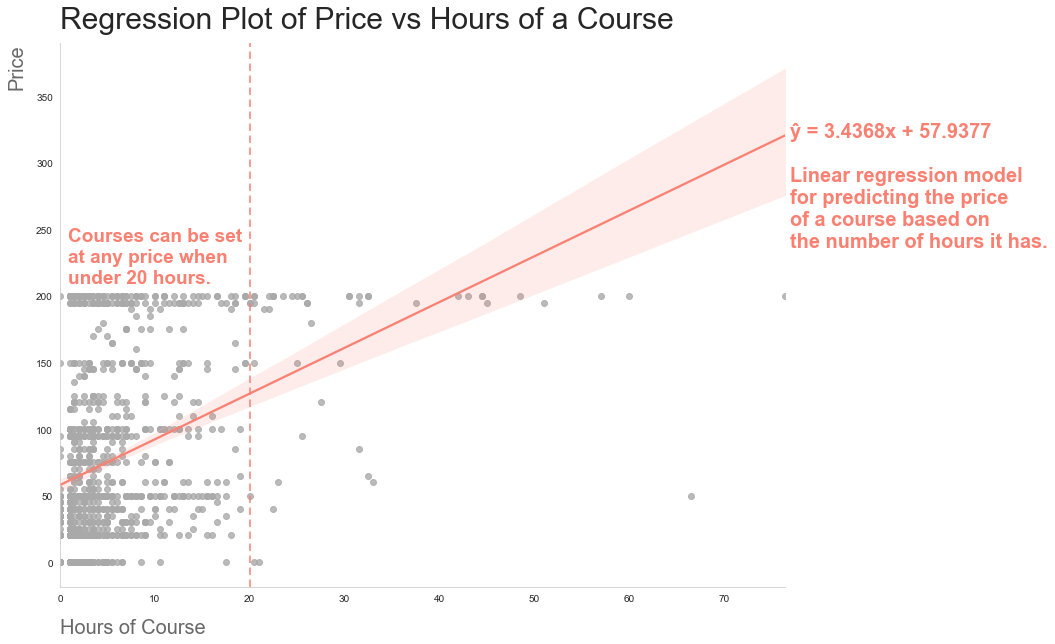

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style("whitegrid", {'axes.grid' : False})
plt.figure(figsize=(13,10))

sns.regplot(x=web_dev.contentInfo_hours, y=web_dev.price, scatter_kws={"color":"darkgrey"}, line_kws={"color":"salmon"})
plt.axvline(x=20,dashes=(5, 3), c='salmon')

sns.despine()
plt.title("Regression Plot of Price vs Hours of a Course",fontsize=30,pad=15,loc='left')
plt.xlabel("Hours of Course", fontsize=20, loc="left",labelpad=15,color="dimgrey")
plt.ylabel("Price", fontsize=20, loc="top",labelpad=10,color="dimgrey")

plt.text(77,237,"ŷ = 3.4368x + 57.9377 \n\nLinear regression model \nfor predicting the price \nof a course based on \nthe number of hours it has.",
         fontsize=20,color='salmon',fontweight='bold')
plt.text(0.8,210,"Courses can be set \nat any price when \nunder 20 hours.",
         fontsize=19,color='salmon',fontweight='bold')

plt.show()

# There is a positive trend but the data is too sporatic to be able to use the regression model to make any insights.
After conducting a regression analysis between `contentInfo_hours` and `price`, we see that there is some positive trend but hardly anything meaningful in their relationship. The constant in the regression model implies that even a course at under an hour should be priced at the minimum of \\$57.94 but there are obviously free classes as well as classes being under 10 hours priced at $200.

A course that ranges between a length of under 1 hour to 20 hours of lectures can be priced anywhere from free to the max price: \\$200. Some courses that are under 1 hour long can cost over $100! This can be explained by the fact Udemy tends to place large discounts on such high prices in order to incentivize more people to purchase access to the course. Discounts can go up to -80% off or free for many days at a time. 

However, when a course has more than 20 hours of lecture, there is some upward trend of it bring priced higher the more hours it has. There is too much variance between all of the plotted points to the regression line to be able to make confident predictions. This disproves the initial hypothesis of the price of a course being dependent on the number of hours of lecture time. This regression model is concluded to be unreliable for practical use but we can see based on the visualization and model that there is a general positive trend between price and hours of a course.

---
# How Are All of the Other Columns Correlated to Each Other?
Below, we observe the correlation coefficients between all of the columns.

In [10]:
print("Correlation Coefficients")
web_dev.corr().round(2)

Correlation Coefficients


,id,isPaid,price,numSubscribers,numReviews,numPublishedLectures,contentInfo_hours
id,1.00,0.04,0.13,-0.26,-0.09,-0.03,-0.05
isPaid,0.04,1.00,0.41,-0.27,-0.07,0.16,0.15
price,0.13,0.41,1.00,0.01,0.13,0.39,0.38
numSubscribers,-0.26,-0.27,0.01,1.00,0.64,0.13,0.15
numReviews,-0.09,-0.07,0.13,0.64,1.00,0.27,0.27
numPublishedLectures,-0.03,0.16,0.39,0.13,0.27,1.00,0.86
contentInfo_hours,-0.05,0.15,0.38,0.15,0.27,0.86,1.00


This correlation matrix is a little difficult to identify anything useful at first glance. To make things a little easier on the eyes, we will turn this matrix into a heatmap and use color to draw our eyes to where columns are most correlated.

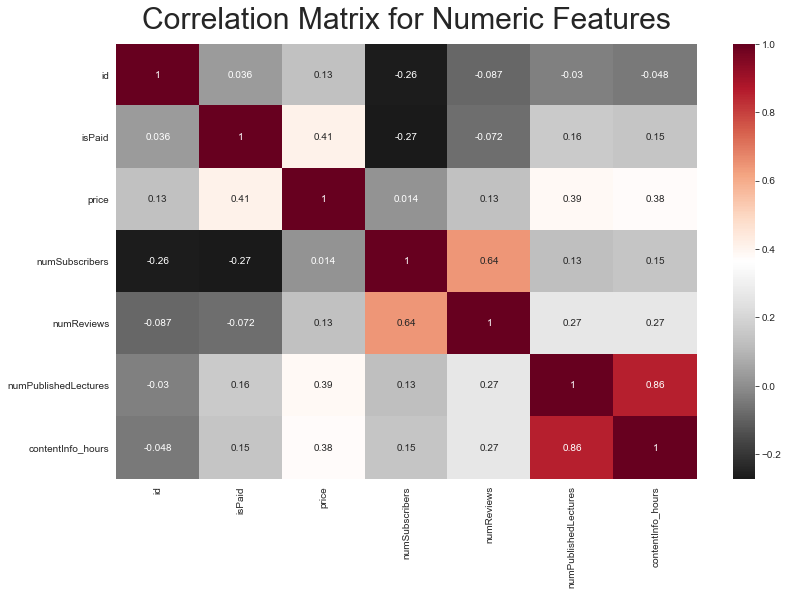

numPublishedLectures  contentInfo_hours       0.859486
contentInfo_hours     numPublishedLectures    0.859486
numReviews            numSubscribers          0.643509
numSubscribers        numReviews              0.643509
dtype: float64

In [11]:
# building our heatmap using the coreelation matrix from the output above
plt.figure(figsize=(13,8))
sns.heatmap(web_dev.corr(), annot=True, cmap='RdGy_r')
plt.title('Correlation Matrix for Numeric Features',fontsize=30,pad=15)
plt.show()

# unstacking turns the correlation matrix into a series object, sort by correlation coefficients
sorted_pairs = web_dev.corr().unstack().sort_values(ascending=False)

# get sorted pairs that's greater than 0.5 but less than 1 (coefficient of 1 means correlation with itself, which isn't useful information)
high_corr = sorted_pairs[sorted_pairs >= 0.5][sorted_pairs < 1]
display(high_corr)

We have created a heatmap out of the correlation matrix and isolated all of the columns with a correlation coefficient of over 0.5.

Even after observing all of the correlation coefficients, we are not able to find anything meaningful that can add to this analysis. The `numPublishedLectures` and `contentInfo_hours` columns have a correlation coefficient of `0.86`, but that doesn't indicate any meaning as a potential business metric to look out for. 
- if there's more lectures, the course is going to last more hours
- if there's more subscribers, there's gonna be more reviews

Looking into `numReviews` may be useful, but the only data we have is on the number of reviews, which can basically be a significance as `numSubscribers`. If we want to use the `numReviews` as a business metric, then we would need more data on the quality of reviews instead.

We can conclude that the number of subscribers is the most important business metric we can consider, given the data we alreay have. None of the other columns will be of much use to us in monitoring the performances of the courses.

---
# Investigating Outliers
So we can see that we can't make much meaningful insights out of getting the correlations between all of the columns. Where can we go from here?

One column we'd want to look deeper into is the `numSubscribers`. With the data we currently have on hand, it is the most obvious column that can act as a business metric that measures the performance of a course.

Looking at some basic statistics on all of the columns, there is a large difference between each of the columns means to their maxes. We can find out what's going on if we look deeper into the `numSubscribers` column.

In [12]:
print("Descriptive Statistics")
web_dev.describe().round(2)

Descriptive Statistics


,id,price,numSubscribers,numReviews,numPublishedLectures,contentInfo_hours
count,1200.00,1200.00,1200.00,1200.00,1200.00,1200.00
mean,706854.25,77.03,6650.48,358.35,52.82,5.56
std,328924.40,66.08,14613.65,1574.81,62.81,7.28
min,8324.00,0.00,19.00,0.00,5.00,0.00
25%,475711.50,20.00,1127.50,25.00,19.00,1.50
50%,738456.00,50.00,2416.50,65.00,32.00,3.00
75%,975271.50,115.00,6894.75,179.25,63.25,6.50
max,1277924.00,200.00,268923.00,27445.00,779.00,76.50


Looking at the data, we can see that the mean is really far away from the max. This hints at the existance of very large outliers. To confirm the outliers, we will proceed with a boxplot to confirm the outliers and a histogram to observe its skewness.

In [13]:
import math

# we will consider the 95th percentile as the outlier boundary
top_quantile = web_dev.numSubscribers.quantile(0.95)
top_quantile = math.ceil(top_quantile)
top_quantile

23020

We have found 23,020 subscribers to be at the 95th percentile of the `numSubscribers` column. Everything after 23,020 subscribers will be considered as outliers.

Text(0, 0.5, 'Count of Courses')

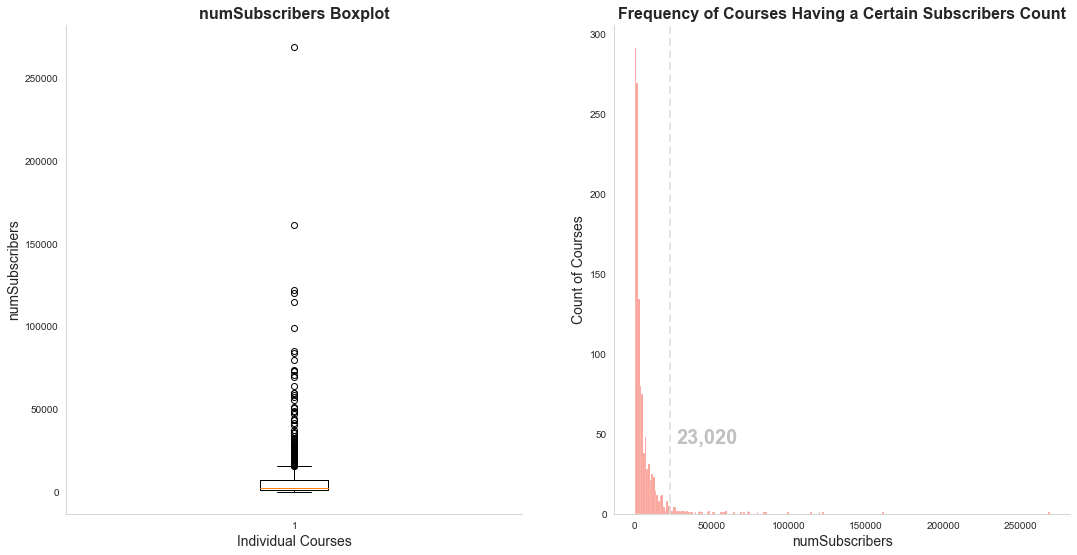

In [14]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(18,9))
sns.despine()

# numSubscribers is a good business metric to observe performance of courses
# we see many outliers and lets find out what's going on
ax1.boxplot(web_dev.numSubscribers)

ax1.set_title("numSubscribers Boxplot", {'fontsize':16, 'fontweight':'bold'})
ax1.set_xlabel("Individual Courses", {'fontsize':14})
ax1.set_ylabel("numSubscribers", {'fontsize':14})

sns.histplot(web_dev.numSubscribers, color='salmon')

ax2.axvline(x=top_quantile,dashes=(5,3), c='gainsboro')

annotation = "{:,}".format(top_quantile)
coords = (top_quantile+4000, 44)
ax2.annotate(annotation, coords, fontsize=20, color='silver', fontweight="bold")

ax2.set_title("Frequency of Courses Having a Certain Subscribers Count", 
              {'fontsize':16,'fontweight':'bold'})

ax2.set_xlabel("numSubscribers",{'fontsize':14})
ax2.set_ylabel("Count of Courses",{'fontsize':14})

After observing the `numSubscribers` column as a boxplot, we see the existance of many extreme outliers. In conjunction with the histogram, we can see just how skewed the data is to the right and that the majority of courses contain less than 23,020 subscribers. The outliers are courses that contain significantly more subscribers — the most extreme outlier having over 11 times more subscribers than at the outlier boundary.

---
# Finding the Relationship Between Non-outliers and Outliers
Now that we have observed the existence and the significance of these outliers, it is now time to perform some calculations to get some insights for what to do about the outiers.

We want to answer questions such as:
- what is the proportion of the number of courses having under 23,020 subscribers to the number of courses having over 23,020 subscribers?
- what is the proportion of the number of subscribers of courses having under 23,020 subscribers to the number of subscribers courses having over 23,020 subscribers?

In [15]:
# new dataframe for courses having under 50000 subscribers
under = web_dev[web_dev.numSubscribers <= top_quantile]
over = web_dev[web_dev.numSubscribers > top_quantile]

# number of courses in each category
total_courses = web_dev.shape[0]
under_count = under.shape[0]
over_count = over.shape[0]

# percentage of courses over or under 2k subscribers with total number of courses
per_courses_under = round((under.shape[0] / web_dev.shape[0])*100, 1)
per_courses_over = round((over.shape[0] / web_dev.shape[0])*100, 1)

# sum of number of subscribers in each category
web_dev_sum = web_dev.numSubscribers.sum()
under_sum = under.numSubscribers.sum()
over_sum = over.numSubscribers.sum()

# percentage of the number of subscribers that are in courses over or under 2k subscribers
over_percentage = ((over.numSubscribers.sum() / web_dev.numSubscribers.sum())*100).round(1)
under_percentage = ((under.numSubscribers.sum() / web_dev.numSubscribers.sum())*100).round(1)

# insert everything into new dataframe
data = {'category': ['Courses Having Under 23,020 Subs','Courses Having Over 23,020 Subs'],
        'number_of_courses': [under_count,over_count],
        'percentage_of_courses': [per_courses_under,per_courses_over],
        'number_of_subscribers': [under_sum,over_sum],
        'percentage_of_subscribers': [under_percentage,over_percentage]}

stats = pd.DataFrame(data, columns=['category','number_of_courses','percentage_of_courses',
                                    'number_of_subscribers','percentage_of_subscribers'])

display(stats)

,category,number_of_courses,percentage_of_courses,number_of_subscribers,percentage_of_subscribers
0,"Courses Having Under 23,020 Subs",1140,95.0,4815333,60.3
1,"Courses Having Over 23,020 Subs",60,5.0,3165239,39.7


Looking at this new dataframe, we see that 95% of courses are responsible for 60% of Udemy's subscribers. However, a miniscule 5% of courses account for 40% of all Udemy subscribers! To make realizing the extent of how significant these numbers are, we will visualize this in a nested pie chart. With the outer pie chart representing Udemy courses, while the inner pie chart represents subscribers.

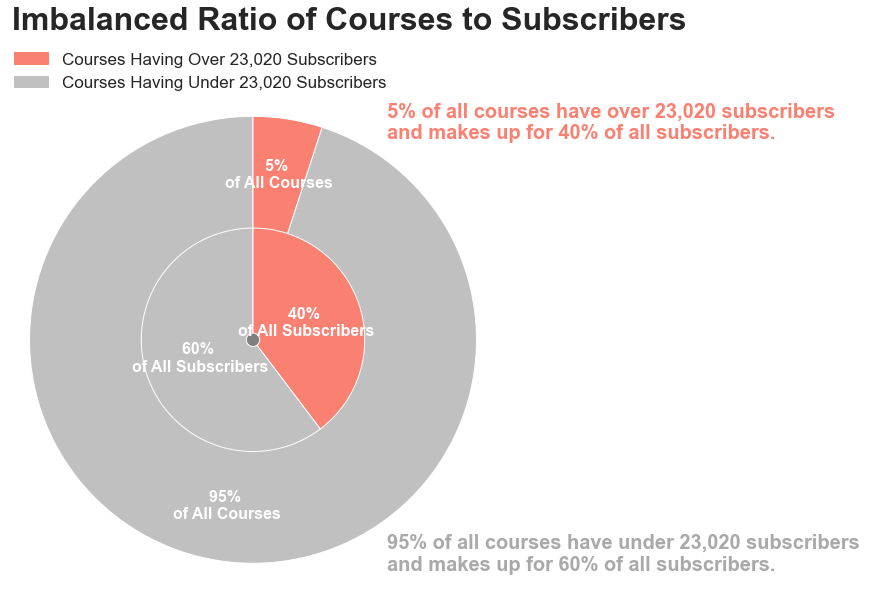

In [16]:
plt.figure(figsize=(7,7))

plt.pie(stats.percentage_of_courses,
        colors=['silver','salmon'],startangle=90,
        pctdistance=0.75,radius=1,labeldistance=1.05,autopct='%1.0f%% \nof All Courses',
        textprops={'fontsize':16,'color':'white','fontweight':'bold'})

plt.pie(stats.percentage_of_subscribers,
        colors=['silver','salmon'],startangle=90,
        pctdistance=0.5,radius=0.5,labeldistance=1.05,autopct='%1.0f%% \nof All Subscribers',
        textprops={'fontsize':16,'color':'white','fontweight':'bold'})

centre_circle = plt.Circle((0,0),0.03,fc='grey')
plt.gca().add_artist(centre_circle)
plt.axis('equal')
plt.tight_layout()

plt.title("Imbalanced Ratio of Courses to Subscribers",fontweight="heavy",fontsize=32,pad=70,loc='left')

plt.text(0.6,0.9,"5% of all courses have over 23,020 subscribers \nand makes up for 40% of all subscribers.",
         fontsize=20,color='salmon',fontweight="heavy")
plt.text(0.6,-1.03,"95% of all courses have under 23,020 subscribers \nand makes up for 60% of all subscribers.",
         fontsize=20,color='darkgrey',fontweight="heavy")

import matplotlib.patches as mpatches
patch = mpatches.Patch(color='salmon',label='Courses Having Over 23,020 Subscribers')
patch2 = mpatches.Patch(color='silver',label='Courses Having Under 23,020 Subscribers')
plt.legend(handles=[patch,patch2],loc='upper center',bbox_to_anchor=(0.39,1.13),prop={'size': 17},frameon=False)

plt.show()

---
# Could Free Courses Explain Things?
In the visual above, we can see that only 5% of all courses contain nearly half of all Udemy subscribers! 

What could explain this? The main metric that influences a potential customer's decision to become a subscriber is the price. Back when we cleaned the `price` column, we had to change the way free courses were represented and we noticed 76 total free classes. After sorting the dataset in descending order by the `numSubscribers` column, a lot of the most popular classes were free! Consumers always tend to be more attracted to a product when it is marked as free. This could be an explanation as to why such a small percentage of courses are responsible for such a large proportion of subscribers.

Below, we can see that a lot of the top courses in popularity are priced at `0`.

In [17]:
# we see that a lot of the more popular courses are free
over[["title","price","numSubscribers"]].head(15)

,title,price,numSubscribers
349,Learn HTML5 Programming From Scratch,0,268923
554,Coding for Entrepreneurs Basic,0,161029
752,The Web Developer Bootcamp,200,121584
305,Build Your First Website in 1 Week with HTML5 ...,0,120291
754,The Complete Web Developer Course 2.0,200,114512
111,Web Design for Web Developers: Build Beautiful...,0,98867
141,Learn Javascript & JQuery From Scratch,30,84897
811,Practical PHP: Master the Basics and Code Dyna...,0,83737
769,JavaScript: Understanding the Weird Parts,175,79612
726,Angular 4 (formerly Angular 2) - The Complete ...,190,73783


We will now do some more calculations and this time, we will split the dataset into whether the number of subscribers are over or under and equal to 23,020 subscribers. Then we will calculation the proportion of free to paid courses within each of those groups.

In [18]:
# remember variables made by calculations a few cells ago, will use them here
under = web_dev[web_dev.numSubscribers <= top_quantile]
over = web_dev[web_dev.numSubscribers > top_quantile]

under_count = under.shape[0]
over_count = over.shape[0]

# free courses among courses with under/over 50,000 subscribers
freeunder = under[under.price == 0]
freeover = over[over.price == 0]

# number of free courses having under/over 50,000 subscribers
freeunder_count = freeunder.shape[0]
freeover_count = freeover.shape[0]

# percent of free courses among courses with under/over 50,000 subscribers
perfreeunder = round(freeunder_count/under_count, 3)*100
perfreeover = round(freeover_count/over_count, 3)*100

free_under = [perfreeunder,100-perfreeunder]
free_over = [perfreeover,100-perfreeover]
courses_under = [freeunder_count, under_count]
courses_over = [freeover_count, over_count]
free_or_paid = ["Free","Paid"]
freePaid = pd.DataFrame({"free_or_paid":free_or_paid,"courses_under":courses_under,"percentage_under":free_under,
                         "courses_over":courses_over,"percentage_over":free_over})
freePaid

,free_or_paid,courses_under,percentage_under,courses_over,percentage_over
0,Free,113,9.9,20,33.3
1,Paid,1140,90.1,60,66.7


# Made stacked bar chart to visualize the distribution of free courses

Text(0.85, 44, '90% Paid')

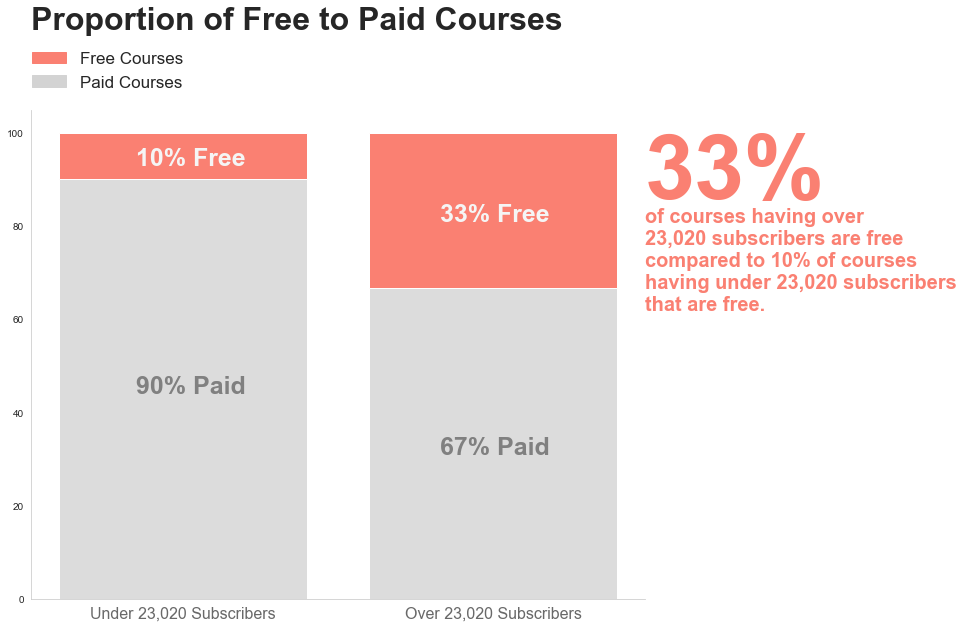

In [19]:
plt.figure(figsize=(11,9))

plt.bar([1,2], [90.1,66.7], color='gainsboro')
plt.bar([1,2], [9.9,33.3], bottom = [90.1,66.7], color='salmon')

sns.despine()

plt.title("Proportion of Free to Paid Courses",fontweight="heavy",fontsize=32,pad=80,loc='left')

patch = mpatches.Patch(color='salmon',label='Free Courses')
patch2 = mpatches.Patch(color='lightgrey',label='Paid Courses')
plt.legend(handles=[patch,patch2],loc='upper center',bbox_to_anchor=(0.125,1.15),prop={'size': 17},frameon=False)

plt.text(2.49,86,"33%",
         fontsize=90,color='salmon',fontweight="heavy")
plt.text(2.49,62,"of courses having over \n23,020 subscribers are free \ncompared to 10% of courses \nhaving under 23,020 subscribers \nthat are free.",
         fontsize=20,color='salmon',fontweight="heavy")

# set x-axis tick labels
plt.xticks(ticks=[1,2], rotation='horizontal', labels=['Under 23,020 Subscribers','Over 23,020 Subscribers'], 
           fontsize=16, fontweight='light',color='dimgrey')

# annotate bar for over 50,000 subscribers
plt.annotate('33% Free',(1.83, 81),fontsize=25,color='whitesmoke',fontweight="bold")
plt.annotate('67% Paid',(1.83, 31),fontsize=25,color='grey',fontweight="bold")

# annotate bar for under 50,000 subscribers
plt.annotate('10% Free',(0.85, 93),fontsize=25,color='whitesmoke',fontweight="bold")
plt.annotate('90% Paid',(0.85, 44),fontsize=25,color='grey',fontweight="bold")

# What if we priced those free courses at \\$10?
We can now see that in the group of courses with over 23,020 subscribers, there is a 1:3 ratio of free to paid classes. In the group of course having under 23,020 subscribers, we have a 1:10 ratio of free to paid courses. A much smaller ratio compared to the other group.

Based on this evidence, we can conclude that a free course has a much higher chance of being popular (an outlier) as opposed to a class that has to be paid for.

Now what can we do with this information? One of the original requests made by management was to figure out how to increase revenue while keeping subscriber retention. Only 5% of courses makes up for the majority of the subscriber base, and within that 5%, 33% are free courses. 

__I propose that after a free course becomes an outlier and crosses over an outlier cutoff of 23,020 or 50,000 subscribers, that a price be set on that course.__

Below, we can see what the potential revenue could have been if all of the free courses that has crossed over the outlier cutoff had been priced at only $10, assuming the same number of subscribers we currently have now.

In [20]:
# if we considered 23,020 subscribers as the outlier cutoff point to start pricing free courses
after = freeover.numSubscribers - 23020
potential = after.sum() * 10
"${:,}".format(potential)

'$9,562,290'

In [21]:
# what if we considered 50,000 subscribers as the outlier cutoff point to start pricing free courses instead?
after50k = freeover.numSubscribers - 50000
potential = after50k.sum() * 10
"${:,}".format(potential)

'$4,166,290'

33% of the most popular classes (over 23,020 subscribers) are free. This is lost opportunity for more revenue. If we have added even just a \\$10 price tag on the free courses when they have reached over 23,020 subscribers, that was a lost opportunity for over \\$9.56 million in potential revenue — \\$4.1 million if the outlier cutoff point is set at 50,000 subscribers instead of 23,020. Once a free course goes over 23,020 subscribers (only 5% of all courses have achieved this so far), a price should be placed. A lot of courses are already \\$10 - \\$20 at their base or discounted price, so it wouldn't hurt to price these courses at that as well when so many people are subscribing to these courses anyway.

# Conclusion
We have reached the end of the project! We've read in and cleaned the data, made and visualized a linear regression model, analyzed and visualized a correlation matrix, investigated outliers and receated visuals to convey the significance of those outliers. The original request by management has been completed and after lots of digging, analyzing, and visualizing, we were able to come up with a proposal that would solve the problem of finding a way to boost revenue while keep the rate of new subscribers up. 

I have learned a lot from this project about cleaning, statisical analysis, and visualizations and have enjoyed it from beginnning to end, no matter how difficult things got. I am very excited to one day be able to use every I've learned here, now as a better data analyst and problem solver than from at the beginning of this project, to bring value to a company that I can believe in and that will believe in me. 